# Decision Trees and Random Forests 

    The following topics are covered:


>Preparing a dataset for training

>Training and interpreting decision trees

>Training and interpreting random forests

>Overfitting, hyperparameter tuning & regularization

>Making predictions on single inputs

Link to the dataset:https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

df=pd.read_csv("weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

    Let's drop any rows where the value of the target column RainTomorrow in empty.

In [5]:
df.dropna(subset=['RainTomorrow'],inplace=True)

In [6]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

## Preparing the Data for Training
    We'll perform the following steps to prepare the dataset for training:

>Create a train/test/validation split

>Identify input and target columns

>Identify numeric and categorical columns

>Impute (fill) missing numeric values

>Scale numeric values to the (0,1) range

>Encode categorical columns to one-hot vectors

C:\Users\amrit\AppData\Local\Temp\ipykernel_952\797858365.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




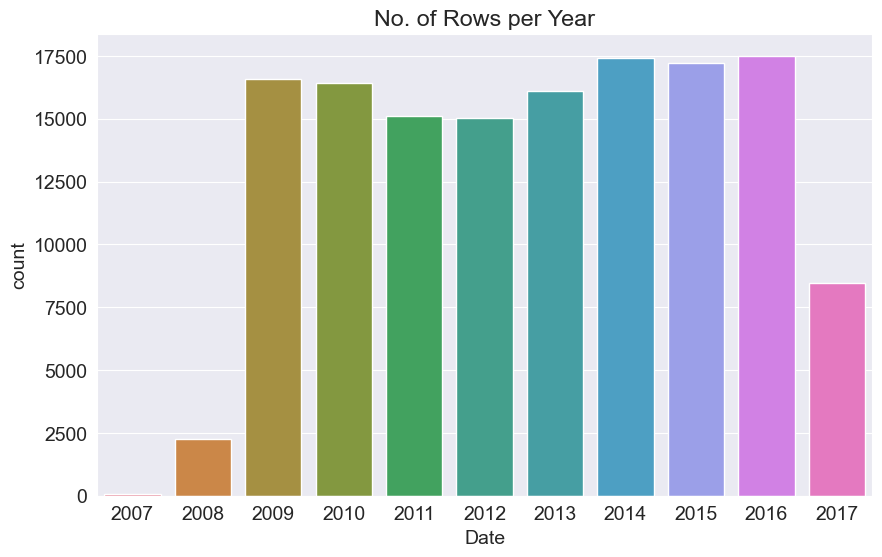

In [8]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(df.Date).dt.year,palette="husl");

In [9]:
# Training, Validation and Test Sets
year=pd.to_datetime(df.Date).dt.year
train_df=df[year<2015]
val_df=df[year==2015]
test_df=df[year>2015]

print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (98988, 23)
val_df.shape : (17231, 23)
test_df.shape : (25974, 23)


In [10]:
#Input and Target Columns
input_cols=list(df.columns)[1:-1]
target_col='RainTomorrow'

In [11]:
train_inputs,train_targets=train_df[input_cols].copy(),train_df[target_col].copy()
val_inputs,val_targets = val_df[input_cols].copy(),val_df[target_col].copy()
test_inputs,test_targets = test_df[input_cols].copy(),test_df[target_col].copy()

In [12]:
numeric_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols =train_inputs.select_dtypes('object').columns.tolist()

In [13]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [14]:
print(categorical_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [15]:
#Imputing missing numeric values
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy = 'mean').fit(df[numeric_cols])
train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [16]:
test_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [17]:
# Scaling Numeric Features
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(df[numeric_cols])

In [18]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [19]:
val_inputs.describe().loc[['min', 'max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.007075,0.030246,0.000000,0.000000,0.0,0.007752,0.000000,0.000000,0.04,0.0,0.125620,0.0816,0.000000,0.000000,0.021097,0.026871
max,0.952830,0.948960,0.666307,0.485517,1.0,1.000000,0.669231,0.850575,1.00,1.0,0.971901,0.9632,0.888889,0.888889,0.943038,0.925144


In [20]:
#Encoding Categorical Data

from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore').fit(df[categorical_cols])
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))

In [21]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

C:\Users\amrit\AppData\Local\Temp\ipykernel_952\1584174743.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\amrit\AppData\Local\Temp\ipykernel_952\1584174743.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\amrit\AppData\Local\Temp\ipykernel_952\1584174743.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame,

In [22]:
test_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
2498,Albury,0.681604,0.801512,0.000000,0.037723,0.525852,ENE,0.372093,NaN,ESE,0.000000,0.080460,0.46,0.17,0.543802,0.5136,0.777778,0.333333,0.702532,0.808061,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2499,Albury,0.693396,0.725898,0.001078,0.037723,0.525852,SSE,0.341085,SSE,SE,0.069231,0.195402,0.54,0.30,0.505785,0.5008,0.888889,0.888889,0.675105,0.712092,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2500,Albury,0.634434,0.527410,0.005930,0.037723,0.525852,ENE,0.325581,ESE,ENE,0.084615,0.448276,0.62,0.67,0.553719,0.6032,0.888889,0.888889,0.611814,0.477927,Yes,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2501,Albury,0.608491,0.538752,0.042049,0.037723,0.525852,SSE,0.255814,SE,SSE,0.069231,0.195402,0.74,0.65,0.618182,0.6304,0.888889,0.888889,0.556962,0.518234,Yes,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [23]:
# As a final step, let's drop the textual categorical columns, so that we're left with just numeric data.
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [24]:
X_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
0,0.516509,0.523629,0.001617,0.037723,0.525852,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.500352,0.508439,0.522073,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.375000,0.565217,0.000000,0.037723,0.525852,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.493021,0.500352,0.514768,0.570058,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.504717,0.576560,0.000000,0.037723,0.525852,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.493021,0.222222,0.594937,0.548944,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.417453,0.620038,0.000000,0.037723,0.525852,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.493021,0.500352,0.533755,0.612284,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.

## Training and Visualizing Decision Trees
    A decision tree in general parlance represents a hierarchical series of binary decisions:

<img src='Decision Trees.png'>
        
    A decision tree in machine learning works in exactly the same way, and except that we let the computer figure out the optimal structure & hierarchy of decisions, instead of coming up with criteria manually.

### Training
    We can use DecisionTreeClassifier from sklearn.tree to train a decision tree.

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
model=DecisionTreeClassifier(random_state=42)

In [28]:
model.fit(X_train,train_targets)

DecisionTreeClassifier(random_state=42)

In [29]:
train_preds=model.predict(X_train)
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [30]:
pd.value_counts(train_preds)

C:\Users\amrit\AppData\Local\Temp\ipykernel_952\1258350197.py:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



No     76707
Yes    22281
Name: count, dtype: int64

    The decision tree also returns probabilities for each prediction.

In [32]:
train_probs=model.predict_proba(X_train)
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

    Seems like the decision tree is quite confident about its predictions.

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(train_targets,train_preds)

0.9999797955307714

    The training set accuracy is close to 100%! But we can't rely solely on the training set accuracy, we must evaluate the model on the validation set too.

    We can make predictions and compute accuracy in one step using model.score

In [36]:
model.score(X_val,val_targets) #incase "Decision Trees"

0.7921188555510418

    Although the training accuracy is 100%, the accuracy on the validation set is just about 79%, which is only marginally better then always predicting "No".

In [38]:
val_targets.value_counts() / len(val_targets)

RainTomorrow
No     0.788289
Yes    0.211711
Name: count, dtype: float64

    It appears that the model has learned the training examples perfect, and doesn't generalize well to previously unseen examples. This phenomenon is called "overfitting", and reducing overfitting is one of the most important parts of any machine learning project.

        Our training accuracy is 100% but the validation accuracy is lower, it’s a clear sign of overfitting.

    What’s Happening?
    our decision tree has learned the training data too well — even the noise or tiny patterns that don’t generalize.

    This results in perfect performance on training data, but poor performance on unseen (validation) data.

    Why Does This Happen?
>High Tree Depth or No Pruning:
The model keeps splitting until all leaves are pure (Gini = 0), memorizing each training sample.

>Too Many Features:
The tree might pick up irrelevant or highly specific patterns that don’t hold in new data.

>Small Dataset:
Not enough variety in data, so the tree easily fits all the training points.

>No Regularization:
Parameters like max_depth, min_samples_split, and min_samples_leaf were not restricted.



## Visualization
    We can visualize the decision tree learned from the training data.

In [41]:
from sklearn.tree import plot_tree, export_text

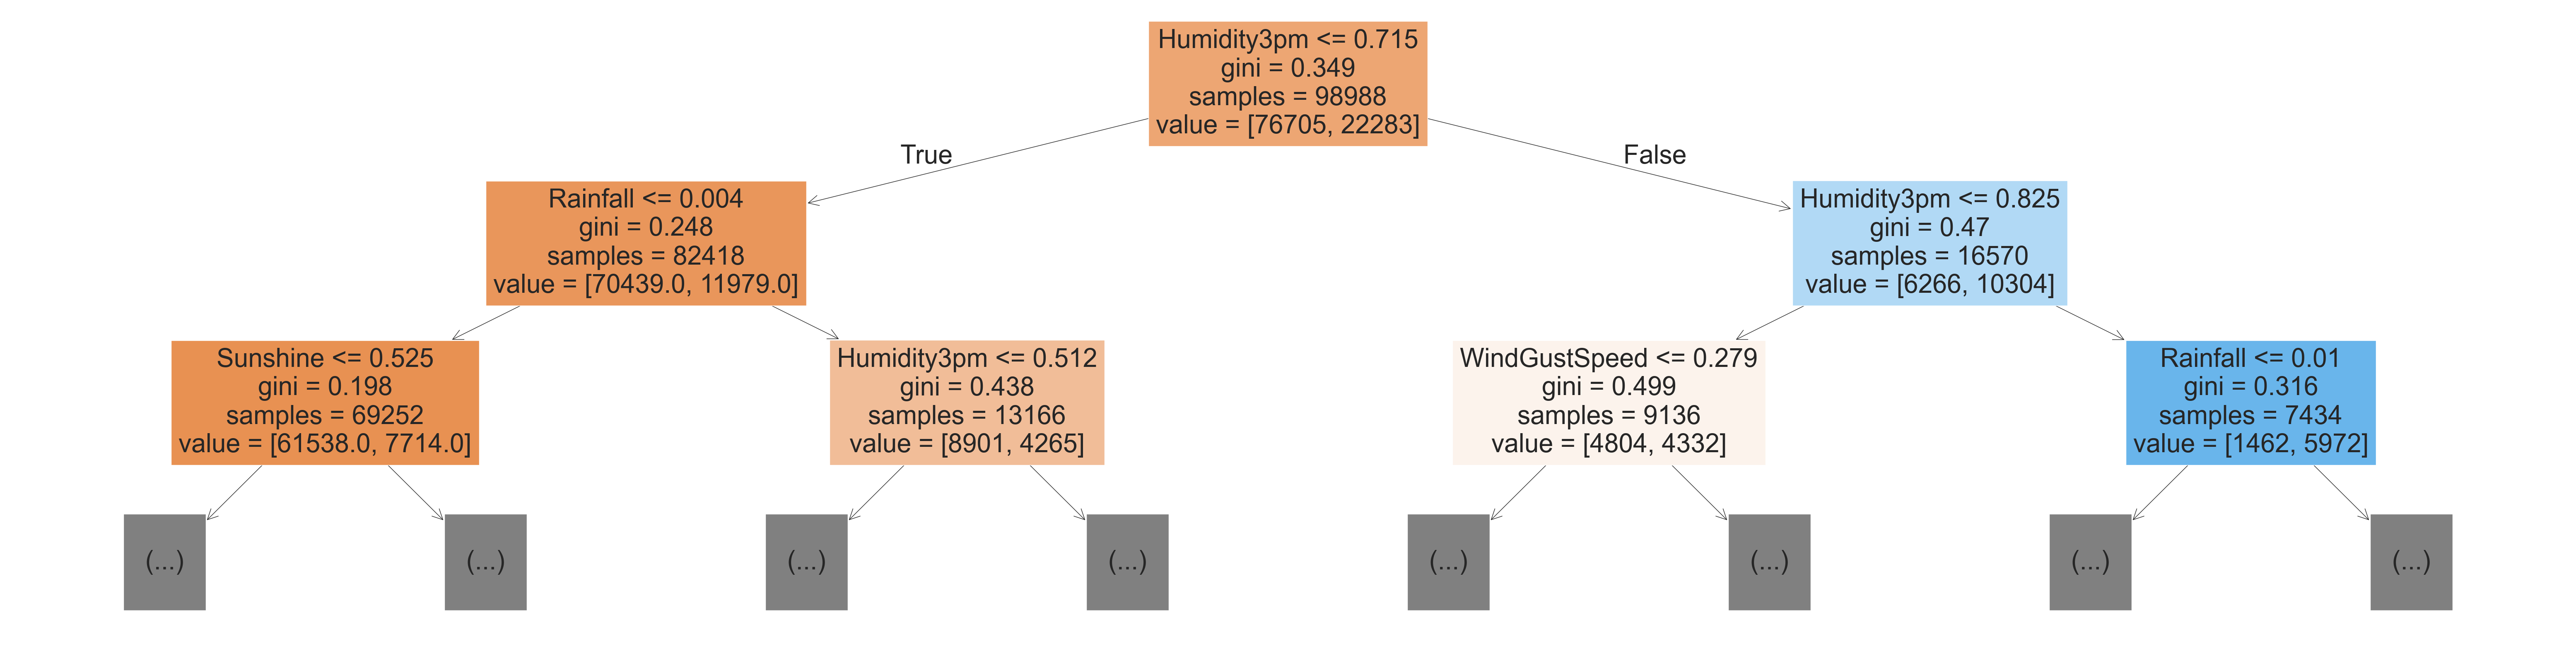

In [42]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

    Can you see how the model classifies a given input as a series of decisions? The tree is truncated here, but following any path from the root node down to a leaf will result in "Yes" or "No". Do you see how a decision tree differs from a logistic regression model? whenever you have a non linear relationship, always better to try out decision tree and check if we are getting better result

### How a Decision Tree is Created

    Note the gini value in each box. This is the loss function used by the decision tree to decide which column should be used for splitting the data, and at what point the column should be split. A lower Gini index indicates a better split. A perfect split (only one class on each side) has a Gini index of 0.

    Conceptually speaking, while training the models evaluates all possible splits across all possible columns and picks the best one. Then, it recursively performs an optimal split for the two portions. In practice, however, it's very inefficient to check all possible splits, so the model uses a heuristic (predefined strategy) combined with some randomization.

    The iterative approach of the machine learning workflow in the case of a decision tree involves growing the tree layer-by-layer:

    let's check the depth of the tree that was created


In [44]:
model.tree_.max_depth

48

In [45]:
# We can also display the tree as text, which can be easier to follow for deeper trees.
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

## Feature Importance
    Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [47]:
model.feature_importances_

array([3.48942086e-02, 3.23605486e-02, 5.91385668e-02, 2.49619907e-02,
       4.94652143e-02, 5.63334673e-02, 2.80205998e-02, 2.98128801e-02,
       4.02182908e-02, 2.61441297e-01, 3.44145027e-02, 6.20573699e-02,
       1.36406176e-02, 1.69229866e-02, 3.50001550e-02, 3.04064076e-02,
       2.24086587e-03, 2.08018104e-03, 1.27475954e-03, 7.26936324e-04,
       1.39779517e-03, 1.15264873e-03, 6.92808159e-04, 1.80675598e-03,
       1.08370901e-03, 1.19773895e-03, 8.87119103e-04, 2.15764220e-03,
       1.67094731e-03, 7.98919493e-05, 1.10558668e-03, 1.42008656e-03,
       4.10087635e-04, 1.09028115e-03, 1.44164766e-03, 9.08284767e-04,
       1.05770304e-03, 6.18133455e-04, 1.80387272e-03, 2.10403527e-03,
       2.74413333e-04, 7.31599405e-04, 1.35408990e-03, 1.54759332e-03,
       1.30917564e-03, 1.07134670e-03, 8.36408023e-04, 1.62662229e-03,
       1.00326116e-03, 2.16053455e-03, 8.46802258e-04, 1.88919081e-03,
       9.29325203e-04, 1.29545157e-03, 1.27604831e-03, 5.12736888e-04,
      

In [48]:
# Let's turn this into a dataframe and visualize the most important features.

importance_df=pd.DataFrame({'feature':X_train.columns,
                           'importance':model.feature_importances_})
importance_df.sort_values('importance',ascending=False).head(10)

,feature,importance
9,Humidity3pm,0.261441
11,Pressure3pm,0.062057
2,Rainfall,0.059139
5,WindGustSpeed,0.056333
4,Sunshine,0.049465
8,Humidity9am,0.040218
14,Temp9am,0.035000
0,MinTemp,0.034894
10,Pressure9am,0.034415
1,MaxTemp,0.032361


C:\Users\amrit\AppData\Local\Temp\ipykernel_952\953760179.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




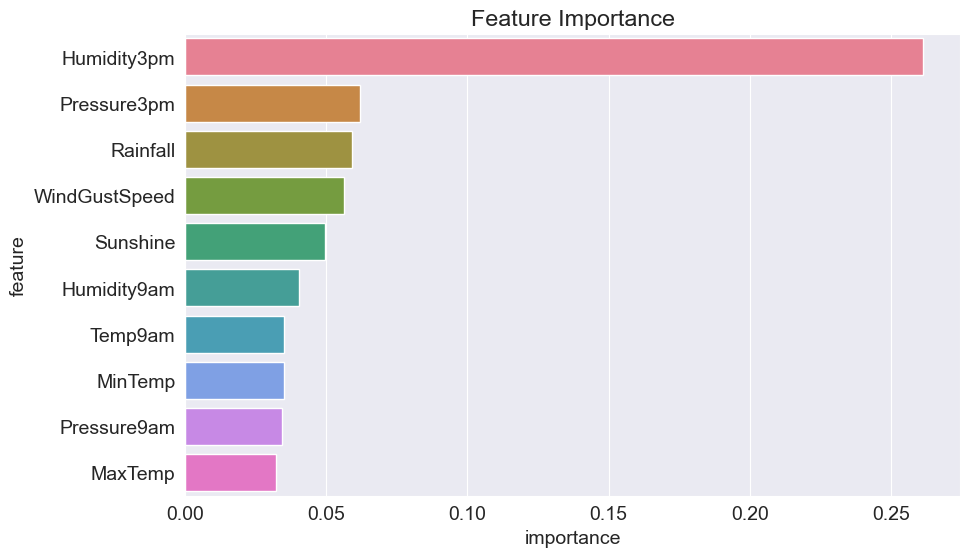

In [49]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.sort_values('importance',ascending=False).head(10), x='importance', y='feature',palette='husl');

## Hyperparameter Tuning and Overfitting
    As we saw in the previous section, our decision tree classifier memorized all training examples, leading to a 100% training accuracy, while the validation accuracy was only marginally better than a dumb baseline model. This phenomenon is called overfitting, and in this section, we'll look at some strategies for reducing overfitting. The process pf reducing overfitting is known as regularlization

    The DecisionTreeClassifier accepts several arguments, some of which can be modified to reduce overfitting.

In [51]:
# ?DecisionTreeClassifier

    These arguments are called hyperparameters because they must be configured manually (as opposed to the parameters within the model which are learned from the data. We'll explore a couple of hyperparameters:

>max_depth

>max_leaf_nodes

### max_depth
    By reducing the maximum depth of the decision tree, we can prevent the tree from memorizing all training examples, which may lead to better generalization

In [53]:
model=DecisionTreeClassifier(max_depth=4,random_state=42).fit(X_train,train_targets)


In [54]:
model.score(X_train,train_targets)

0.8342930456216915

In [55]:
model.score(X_val,val_targets)

0.8356450583251117

    Choosing max_depth for a Decision Tree should not be random — it’s a hyperparameter that controls how complex the tree can grow, and choosing it well helps avoid overfitting or underfitting.
    For the best depth we will use Cross-Validation 

    🔍 What does cv=5 mean?
>It means you're using 5-fold cross-validation:

>The training data is split into 5 equal parts (folds).

>The model is trained on 4 folds and validated on the remaining 1 fold.

>This process repeats 5 times, each time using a different fold as the validation set.

>The result is 5 accuracy scores, and their average gives a more reliable estimate of the model's performance.

    ✅ Why is this useful?

>It helps reduce overfitting risk.

>It ensures the model is tested on different subsets.

>You get a more stable performance measure than a single train/test split.

## 📌 How to choose the best `cv` value?

| Scenario                | Recommended `cv` value        | Why                                      |
|-------------------------|-------------------------------|-------------------------------------------|
| Small dataset (≤ 1,000 rows) | `cv=5` or `cv=10`               | More folds → better use of data           |
| Medium dataset (1k–10k) | `cv=5`                        | Good balance of training/validation       |
| Large dataset (>10k)    | `cv=3` or even `cv=2`         | Less computation, still accurate          |
| Very small dataset      | `cv=LeaveOneOut` (i.e., `cv=n`) | Each row gets used as a validation case   |

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

best_depth = None
best_score = 0

for depth in range(1, 21):
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(model, X_train, train_targets, cv=2)
    mean_score = scores.mean()
    print(f"Depth: {depth}, Accuracy: {mean_score:.4f}")
    
    if mean_score > best_score:
        best_score = mean_score
        best_depth = depth

print(f"\n✅ Best Depth: {best_depth} with Accuracy: {best_score:.4f}")

Depth: 1, Accuracy: 0.8115
Depth: 2, Accuracy: 0.8211
Depth: 3, Accuracy: 0.8170
Depth: 4, Accuracy: 0.8282
Depth: 5, Accuracy: 0.8332
Depth: 6, Accuracy: 0.8293
Depth: 7, Accuracy: 0.8285
Depth: 8, Accuracy: 0.8255
Depth: 9, Accuracy: 0.8237
Depth: 10, Accuracy: 0.8196
Depth: 11, Accuracy: 0.8157
Depth: 12, Accuracy: 0.8108
Depth: 13, Accuracy: 0.8077
Depth: 14, Accuracy: 0.8046
Depth: 15, Accuracy: 0.7992
Depth: 16, Accuracy: 0.7957
Depth: 17, Accuracy: 0.7894
Depth: 18, Accuracy: 0.7863
Depth: 19, Accuracy: 0.7849
Depth: 20, Accuracy: 0.7809

✅ Best Depth: 5 with Accuracy: 0.8332


In [58]:
model=DecisionTreeClassifier(max_depth=best_depth,random_state=42).fit(X_train,train_targets)


In [59]:
model.score(X_train,train_targets)

0.8393239584596113

In [60]:
model.score(X_val,val_targets)

0.8409262375950322

In [61]:
model.score(X_test,test_targets)

0.8285593285593286

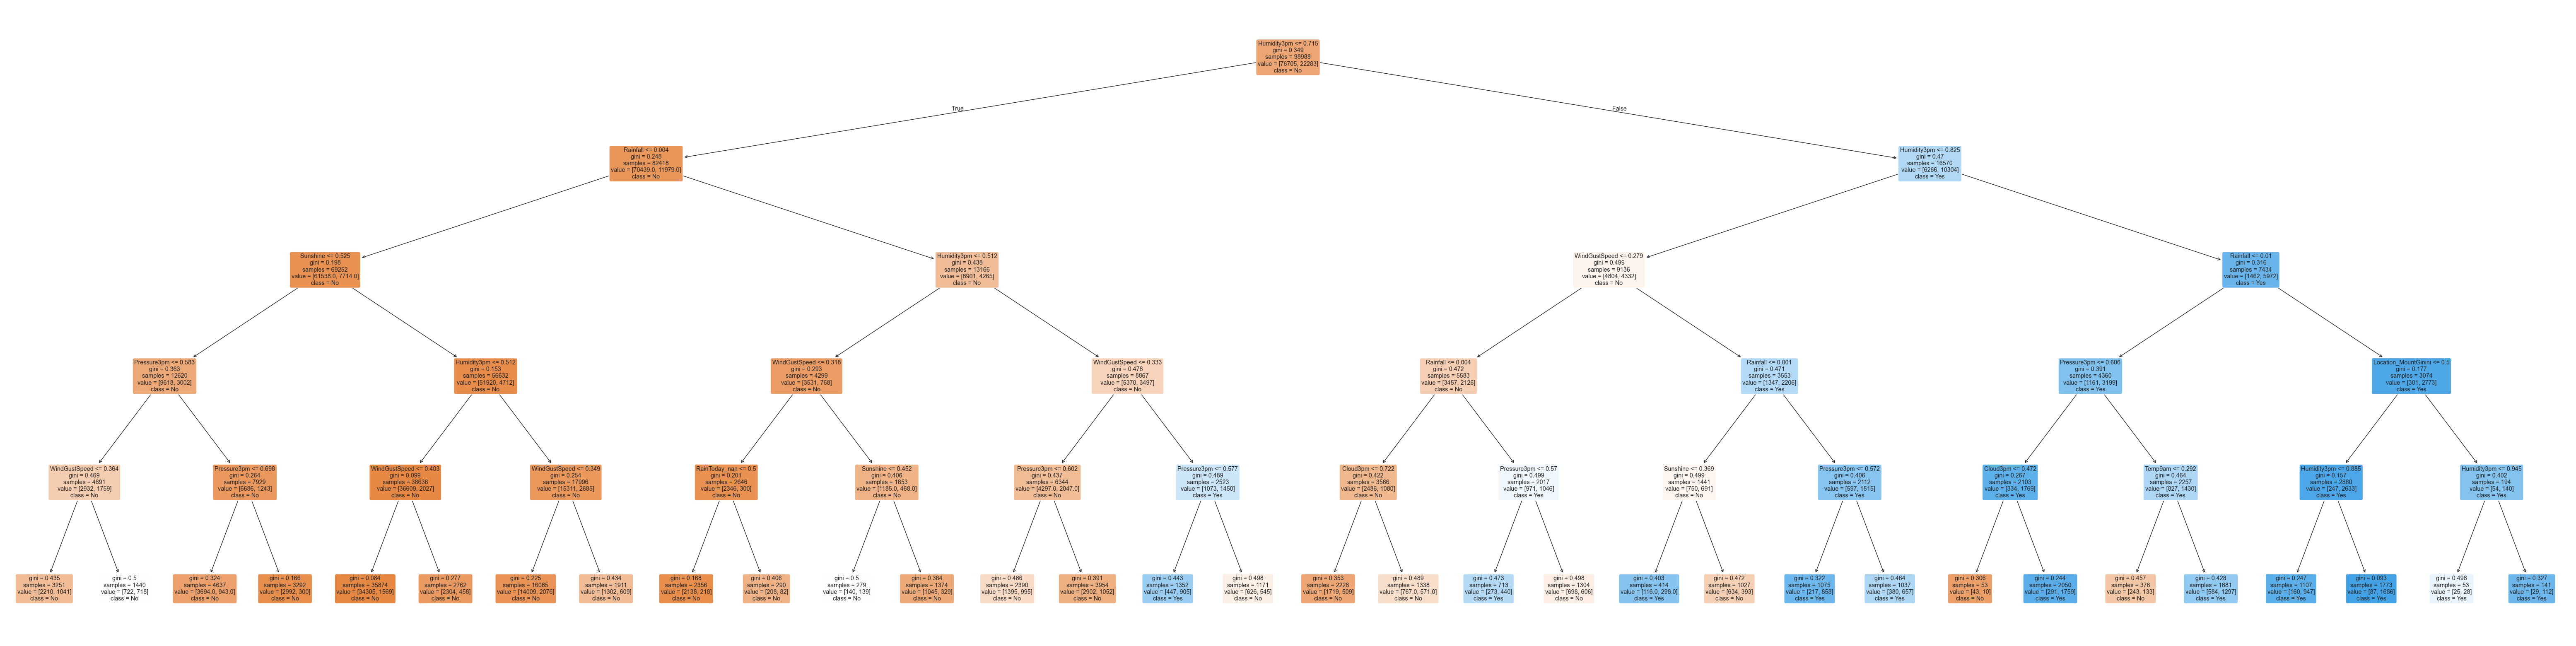

In [62]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [63]:
print(export_text(model, feature_names=list(X_train.columns)))

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- class: No
|   |   |   |   |--- WindGustSpeed >  0.36
|   |   |   |   |   |--- class: No
|   |   |   |--- Pressure3pm >  0.58
|   |   |   |   |--- Pressure3pm <= 0.70
|   |   |   |   |   |--- class: No
|   |   |   |   |--- Pressure3pm >  0.70
|   |   |   |   |   |--- class: No
|   |   |--- Sunshine >  0.52
|   |   |   |--- Humidity3pm <= 0.51
|   |   |   |   |--- WindGustSpeed <= 0.40
|   |   |   |   |   |--- class: No
|   |   |   |   |--- WindGustSpeed >  0.40
|   |   |   |   |   |--- class: No
|   |   |   |--- Humidity3pm >  0.51
|   |   |   |   |--- WindGustSpeed <= 0.35
|   |   |   |   |   |--- class: No
|   |   |   |   |--- WindGustSpeed >  0.35
|   |   |   |   |   |--- class: No
|   |--- Rainfall >  0.00
|   |   |--- Humidity3pm <= 0.51
|   |   |   |--- WindGustSpeed <= 0.32
|   |   |   |   |--- Ra

    You'll often need to tune hyperparameters carefully to find the optimal fit. In the above case, it appears that a maximum depth of 5 results in the lowest validation error.

### max_leaf_nodes
    Another way to control the size of complexity of a decision tree is to limit the number of leaf nodes. This allows branches of the tree to have varying depths.

In [66]:
best_leaf = None
best_score = 0
leaf_range = range(90, 130)  # Try leaf nodes from 2 to 100

for leaf in leaf_range:
    model = DecisionTreeClassifier(max_leaf_nodes=leaf, random_state=42)
    scores = cross_val_score(model, X_train, train_targets, cv=2)
    mean_score = scores.mean()
    
    print(f"Leaf Nodes: {leaf}, Accuracy: {mean_score:.4f}")
    
    if mean_score > best_score:
        best_score = mean_score
        best_leaf = leaf

print(f"\n✅ Best max_leaf_nodes: {best_leaf} with Accuracy: {best_score:.4f}")

Leaf Nodes: 90, Accuracy: 0.8284
Leaf Nodes: 91, Accuracy: 0.8279
Leaf Nodes: 92, Accuracy: 0.8279
Leaf Nodes: 93, Accuracy: 0.8279
Leaf Nodes: 94, Accuracy: 0.8278
Leaf Nodes: 95, Accuracy: 0.8280
Leaf Nodes: 96, Accuracy: 0.8283
Leaf Nodes: 97, Accuracy: 0.8281
Leaf Nodes: 98, Accuracy: 0.8281
Leaf Nodes: 99, Accuracy: 0.8280
Leaf Nodes: 100, Accuracy: 0.8281
Leaf Nodes: 101, Accuracy: 0.8281
Leaf Nodes: 102, Accuracy: 0.8281
Leaf Nodes: 103, Accuracy: 0.8282
Leaf Nodes: 104, Accuracy: 0.8283
Leaf Nodes: 105, Accuracy: 0.8282
Leaf Nodes: 106, Accuracy: 0.8282
Leaf Nodes: 107, Accuracy: 0.8284
Leaf Nodes: 108, Accuracy: 0.8284
Leaf Nodes: 109, Accuracy: 0.8284
Leaf Nodes: 110, Accuracy: 0.8280
Leaf Nodes: 111, Accuracy: 0.8277
Leaf Nodes: 112, Accuracy: 0.8275
Leaf Nodes: 113, Accuracy: 0.8273
Leaf Nodes: 114, Accuracy: 0.8275
Leaf Nodes: 115, Accuracy: 0.8275
Leaf Nodes: 116, Accuracy: 0.8274
Leaf Nodes: 117, Accuracy: 0.8270
Leaf Nodes: 118, Accuracy: 0.8270
Leaf Nodes: 119, Accurac

In [67]:
model=DecisionTreeClassifier(max_leaf_nodes=107,random_state=42).fit(X_train,train_targets)

In [68]:
model.score(X_train,train_targets)

0.8468501232472623

In [69]:
model.score(X_val,val_targets)

0.84446636875399

In [70]:
model.tree_.max_depth

12

    To find the best combination of max_depth and max_leaf_nodes, you should use RandomizedSearchCV with cross-validation — this will systematically try all combinations and pick the one with the best validation accuracy.

In [72]:

from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

param_dist = {
    'max_depth': range(2, 21),
    'max_leaf_nodes': range(10, 131)
}

rand_search = RandomizedSearchCV(
    model, param_distributions=param_dist,
    n_iter=30, cv=3, scoring='accuracy', n_jobs=-1, random_state=42
)

rand_search.fit(X_train, train_targets)
print("Best Parameters:", rand_search.best_params_)
print("Best Accuracy:", rand_search.best_score_)

Best Parameters: {'max_leaf_nodes': 50, 'max_depth': 4}
Best Accuracy: 0.8280599668646705


In [73]:
model=DecisionTreeClassifier(max_leaf_nodes=50,max_depth=4,random_state=42).fit(X_train,train_targets)

In [74]:
model.score(X_train,train_targets)

0.8342930456216915

In [75]:
model.score(X_val,val_targets)

0.8356450583251117

# Training a Random Forest
    While tuning the hyperparameters of a single decision tree may lead to some improvements, a much more effective strategy is to combine the results of several decision trees trained with slightly different parameters. This is called a random forest.

    The key idea here is that each decision tree in the forest will make different kinds of errors, and upon averaging, many of their errors will cancel out. This idea is also known as the "wisdom of the crowd" in common parlance:
    
<img src='Random Forest.png'>

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
model=RandomForestClassifier(n_jobs=-1,random_state=42)

In [79]:
%%time
model.fit(X_train, train_targets)

CPU times: total: 54.5 s
Wall time: 5.43 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [80]:
model.score(X_train, train_targets)

0.9999494888269285

In [81]:
model.score(X_val, val_targets)

0.8566537055307295

    Once again, the training accuracy is 100%, but this time the validation accuracy is much better. In fact, it is better than the best single decision tree we had trained so far.

    This general technique of combining the results of many models is called "ensembling", it works because most errors of individual models cancel out on averaging.

<img src='Decision boundary.png'>

    We can also look at the probabilities for the predictions. The probability of a class is simply the fraction of trees which that predicted the given class.

In [83]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.93, 0.07],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.96, 0.04]])

In [84]:
train_probs=model.predict_proba(X_val)
train_probs

array([[0.98, 0.02],
       [0.92, 0.08],
       [0.94, 0.06],
       ...,
       [0.9 , 0.1 ],
       [0.93, 0.07],
       [0.87, 0.13]])

    We can can access individual decision trees using model.estimators_

In [86]:
len(model.estimators_) #Total 100 decision tree by default

100

In [87]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

[Text(0.5, 0.875, 'Sunshine <= 0.403\ngini = 0.347\nsamples = 62607\nvalue = [76887, 22101]\nclass = No'),
 Text(0.25, 0.625, 'Pressure9am <= 0.609\ngini = 0.499\nsamples = 11288\nvalue = [9272, 8542]\nclass = No'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Cloud9am <= 0.833\ngini = 0.475\nsamples = 6067\nvalue = [3702, 5808]\nclass = Yes'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'WindGustDir_NNE <= 0.5\ngini = 0.442\nsamples = 5221\nvalue = [5570.0, 2734.0]\nclass = No'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'RainToday_Yes <= 0.5\ngini = 0.278\nsamples = 51319\nvalue = [67615, 13559]\nclass = No'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Pressure9am <= 0.521\ngini = 0.207\nsamples = 41960\nvalue = [58514.0, 7796.0]\nclass = No'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Pressure9am <= 0.614

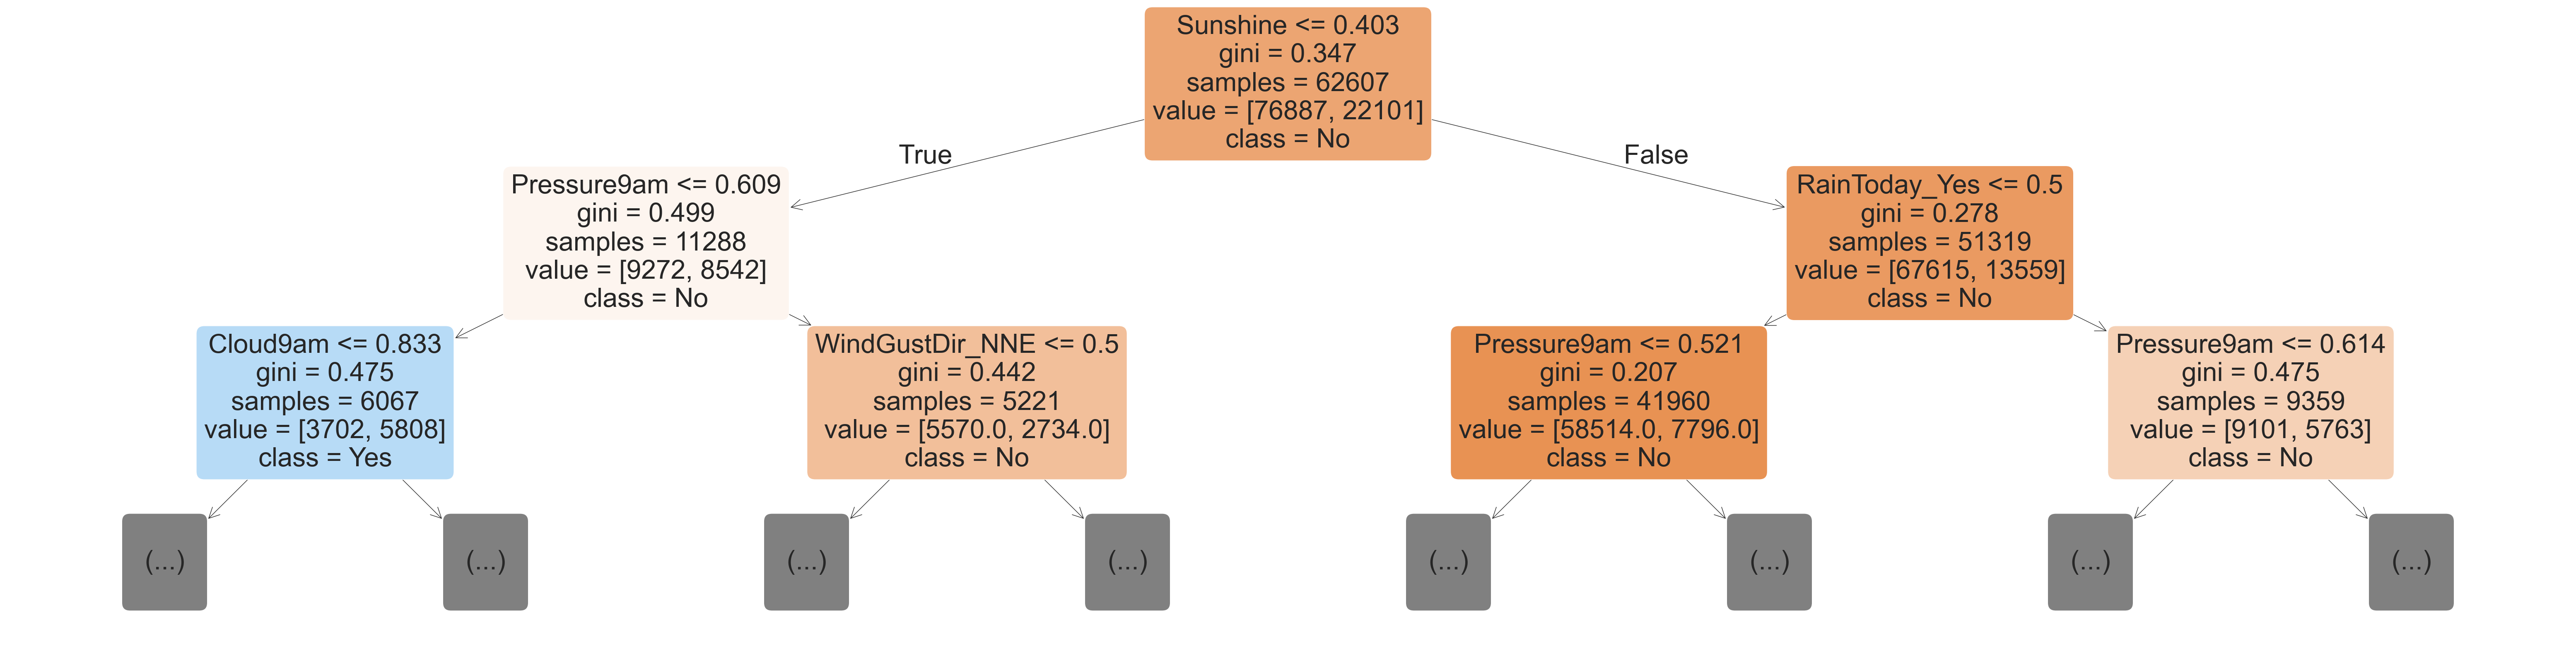

In [88]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_)

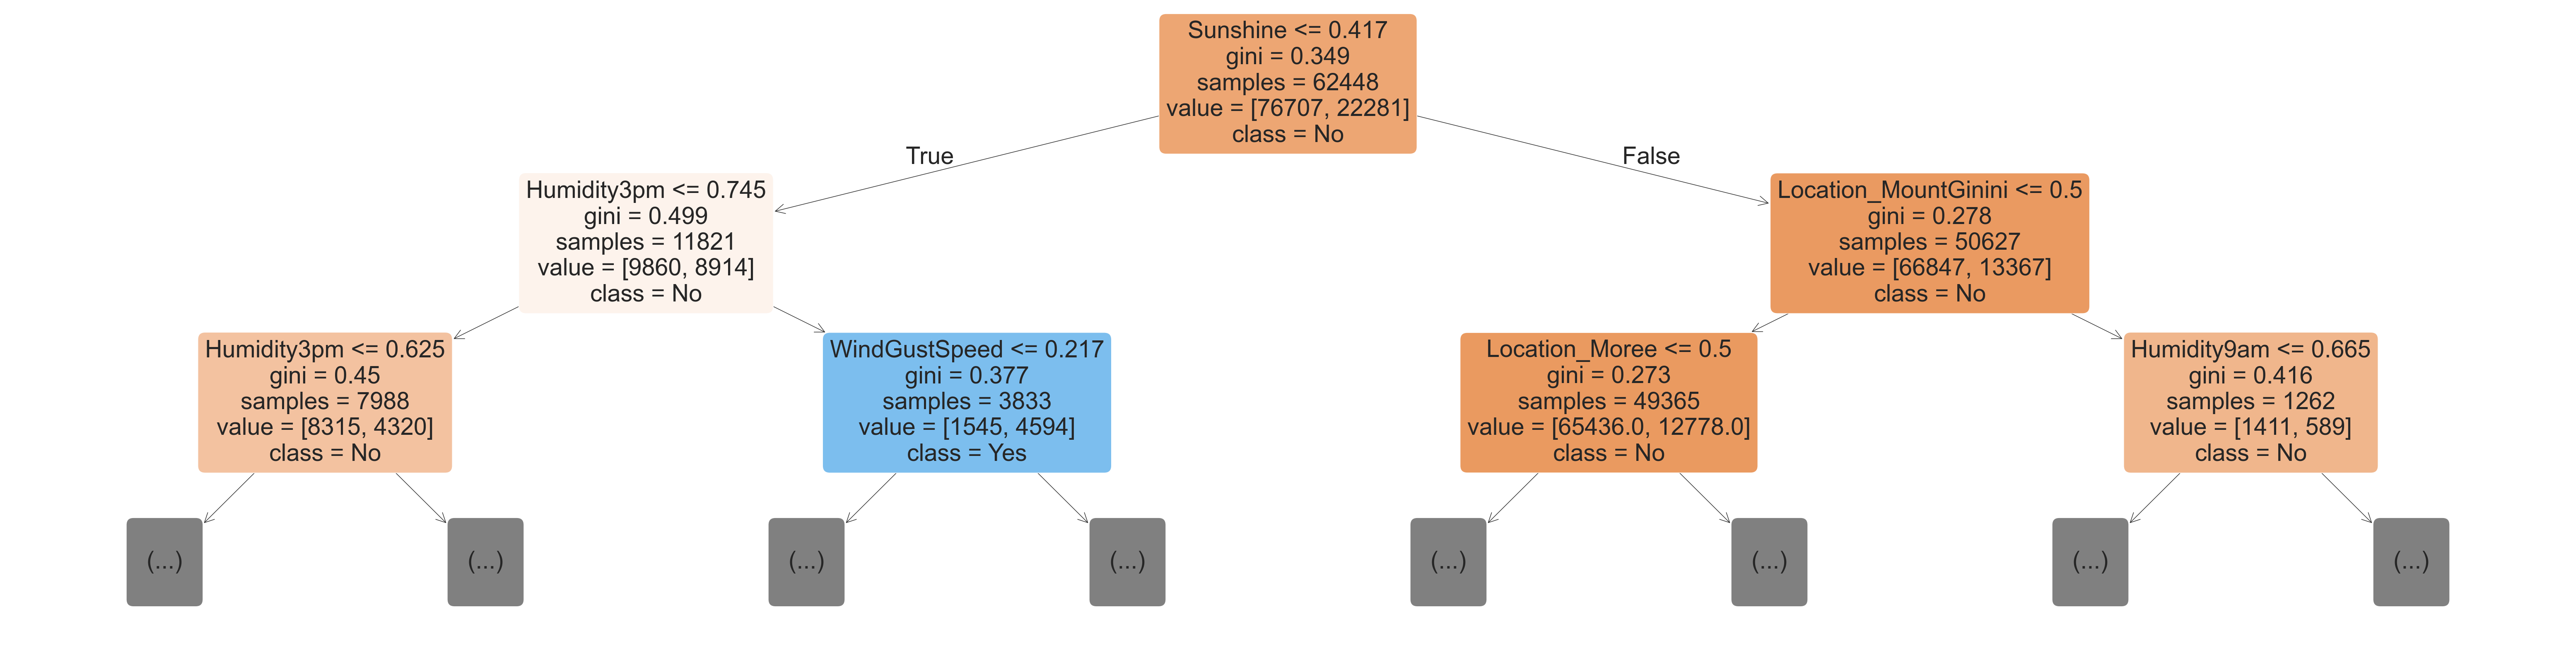

In [89]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[15], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

    Just like decision tree, random forests also assign an "importance" to each feature, by combining the importance values from individual trees.

In [91]:
importance_df=pd.DataFrame({'feature':X_train.columns,'importance':model.feature_importances_})
importance_df.sort_values('importance',ascending=False).head(10)

,feature,importance
9,Humidity3pm,0.139904
4,Sunshine,0.053696
11,Pressure3pm,0.052713
8,Humidity9am,0.050051
2,Rainfall,0.048077
10,Pressure9am,0.047944
5,WindGustSpeed,0.047477
15,Temp3pm,0.044379
1,MaxTemp,0.041865
0,MinTemp,0.041199


C:\Users\amrit\AppData\Local\Temp\ipykernel_952\953760179.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




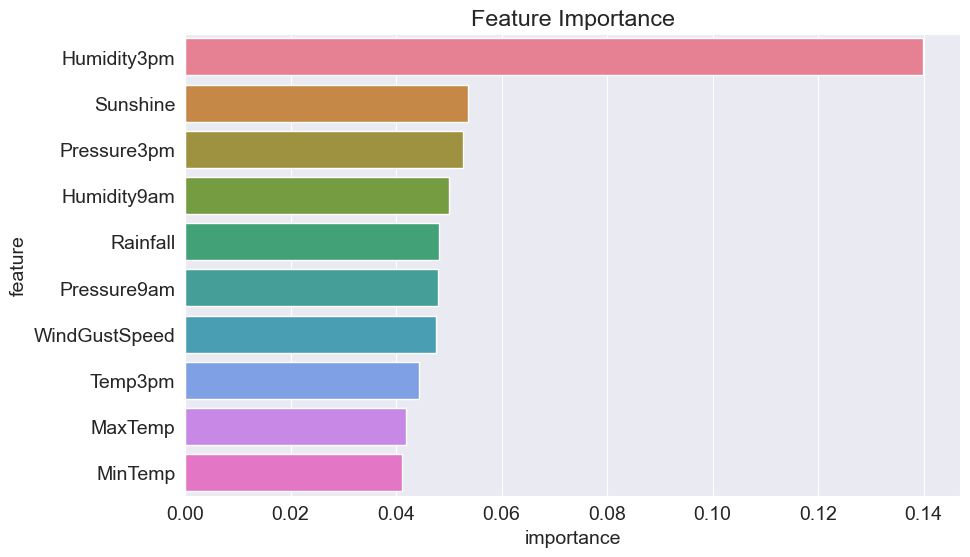

In [92]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.sort_values('importance',ascending=False).head(10), x='importance', y='feature',palette='husl');

    Notice that the distribution is a lot less skewed than that for a single decision tree.

# Hyperparameter Tuning with Random Forests
    Just like decision trees, random forests also have several hyperparameters. In fact many of these hyperparameters are applied to the underlying decision trees.

    Let's study some the hyperparameters for random forests. You can learn more about them here: 
>https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

    Let's create a base model with which we can compare models with tuned hyperparameters.

In [96]:

base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train, train_targets)


In [97]:
base_train_acc=base_model.score(X_train,train_targets)
base_val_acc=base_model.score(X_val,val_targets)


In [98]:
base_accs=base_train_acc,base_val_acc
base_accs

(0.9999494888269285, 0.8566537055307295)

## n_estimators
    This controls the number of decision trees in the random forest. The default value is 100. For larger datasets, it helps to have a greater number of estimators. As a general rule, try to have as few estimators as needed.
    When we use the estimators, we increase the randomness within the data. Randomness helps to reduce overfitting. The more the randomnes the less the overfitting we will have 

>10 estimators

In [100]:
model = RandomForestClassifier(random_state=42, n_jobs=-1,n_estimators=10).fit(X_train, train_targets)

In [101]:
model.score(X_train,train_targets),model.score(X_val,val_targets)

(0.986958015112943, 0.8485868492832686)

    Although, validation accuracy isn't too far from train accuracy, but its is still low. So it seems like we do need to increase our number of estimators to a certain value. Small estimators will not give us a good result,So we need to incrase number of estimators in our model  

In [103]:
model = RandomForestClassifier(random_state=42, n_jobs=-1,n_estimators=500).fit(X_train, train_targets)

In [104]:
model.score(X_train,train_targets),model.score(X_val,val_targets)

(0.9999797955307714, 0.8577563693343393)

    As a general rule, try to have as few estimators as needed. So if we can do the job with 100 and if going from 100 to 200 is not helping,its not really increase our accuracy or loss, then we can stay with 100. If going from 100 to 200 giving us a good result then we can try. For try out its good to duble it out 100->200->400->800. Doubling is going to be too small but the cose of how long it takes to train the model is going to be too high.
    
    Like with 500,it turns out that when I do 500, i get 85.7%.  i.e. 0.1% increases in accuracy from 85.6%(base model). Now do i need to care enough about 0.1 accuracy improvements? in some cases we might because it may mean something. For Ex, if it is some kind of a financial model, then may be that 0.1% can make our money or it can improve our estimate of the risk, so in that case we should may be get it, and if also we have the hardware to spare, we don't mind traing model with 500 estimators. But if we really don't care, if we are more concerned about 85 vs 90, then I wouldn't bother with it too much, If i'm just getting a 0.1% increase by using 5 times more decision trees.

    Some casess when we have a big data set like data set with millions of rows, then we will have to go with 100, sometimes may be 1000 estimators. That's not vey uncommon. The default in scikit-learn used to be 10 estimators, And that was recently bumbed a few year ago 200 estimators, because the data sets have started to get much larger

## max_depth and max_leaf_nodes
    These arguments are passed directly to each decision tree, and control the maximum depth and max. no leaf nodes of each tree respectively. By default, no maximum depth is specified, which is why each tree has a training accuracy of 100%. You can specify a max_depth to reduce overfitting.



    Let's define a helper function to max depth, max_leaf_nodes and other hyperparameters easily.

In [108]:
def test_params(**params):
    model=RandomForestClassifier(random_state=42, n_jobs=-1,**params).fit(X_train, train_targets)
    return model.score(X_train, train_targets), model.score(X_val, val_targets)

    Let's test a few values of max_depth.

In [110]:
test_params(max_depth=5)

(0.8197862367155615, 0.8240961058557251)

In [111]:
test_params(max_depth=26)

(0.9814826039519942, 0.8572340549010504)

    Lets check what will be the best depth cross validation

In [113]:
depths = range(5, 50,5)
mean_scores = []

print("max_depth\tCV Accuracy")
for d in depths:
    rf = RandomForestClassifier(max_depth=d, random_state=42, n_jobs=-1)
    scores = cross_val_score(rf, X_train, train_targets, cv=5, scoring='accuracy')
    mean_score = scores.mean()
    mean_scores.append(mean_score)
    print(f"{d}\t\t{mean_score:.4f}")


best_depth = depths[np.argmax(mean_scores)]
print(f"\nBest max_depth: {best_depth} with CV accuracy: {max(mean_scores):.4f}")

max_depth	CV Accuracy
5		0.8185
10		0.8323
15		0.8179
20		0.8169
25		0.8170
30		0.8166
35		0.8169
40		0.8164
45		0.8178

Best max_depth: 10 with CV accuracy: 0.8323


    Lets calcualte max_leaf_nodes 

In [115]:

leaf_nodes = range(10, 151, 10)
mean_scores = []

print("max_leaf_nodes\tCV Accuracy")
for l in leaf_nodes:
    rf = RandomForestClassifier(max_leaf_nodes=l, random_state=42, n_jobs=-1)
    scores = cross_val_score(rf, X_train, train_targets, cv=5, scoring='accuracy')
    mean_score = scores.mean()
    mean_scores.append(mean_score)
    print(f"{l}\t\t{mean_score:.4f}")

best_leaf = leaf_nodes[np.argmax(mean_scores)]
print(f"\nBest max_leaf_nodes: {best_leaf} with CV accuracy: {max(mean_scores):.4f}")

max_leaf_nodes	CV Accuracy
10		0.8064
20		0.8188
30		0.8249
40		0.8257
50		0.8268
60		0.8267
70		0.8265
80		0.8260
90		0.8265
100		0.8261
110		0.8256
120		0.8261
130		0.8256
140		0.8258
150		0.8260

Best max_leaf_nodes: 50 with CV accuracy: 0.8268


In [116]:
test_params(max_leaf_nodes=50)

(0.8356265405907787, 0.8369218269398178)

    Lets check the the accuracy with max_depth=10,max_leaf_nodes=50

In [118]:
test_params(max_depth=10,max_leaf_nodes=50)

(0.8361114478522649, 0.837037896813882)

## max_features
    Instead of picking all features for every split, we can specify only a fraction of features to be chosen randomly.

<img src='max_feature.png'>

    Notice that the default value auto causes only sqrt of 'n' out of total features ( n ) to be chosen randomly at each split. This is the reason each decision tree is in the forest is different. While it may seem counterintuitive, choosing all features for every split of every tree will lead to identical trees, so the random forest will not generalize well.

In [121]:
test_params(max_features='log2')

(0.9999595910615429, 0.8558992513493123)

In [122]:
test_params(max_features=60)

(0.9999494888269285, 0.8567697754047937)

In [123]:
base_accs

(0.9999494888269285, 0.8566537055307295)

In [274]:
features_options = range(10, 151, 10)  # You can also add custom float values (like 0.5, 0.7 etc.)
mean_scores = []

print("max_features\tCV Accuracy")
for f in features_options:
    scores = cross_val_score(rf, X_train, train_targets, cv=5, scoring='accuracy')
    mean_score = scores.mean()
    mean_scores.append(mean_score)
    print(f"{f}\t\t{mean_score:.4f}")

best_feature = features_options[np.argmax(mean_scores)]
print(f"\nBest max_features: {best_feature} with CV accuracy: {max(mean_scores):.4f}")

max_features	CV Accuracy
10		0.8177
20		0.8177
30		0.8177
40		0.8177
50		0.8177
60		0.8177
70		0.8177
80		0.8177
90		0.8177
100		0.8177
110		0.8177
120		0.8177
130		0.8177
140		0.8177
150		0.8177

Best max_features: 10 with CV accuracy: 0.8177


## min_samples_split and min_samples_leaf
    By default, the decision tree classifier tries to split every node that has 2 or more. You can increase the values of these arguments to change this behavior and reduce overfitting, especially for very large datasets.

    Lets create functions to calcualate min_samples_split and min_samples_leaf

In [125]:

splits = range(10, 151, 10)
mean_scores = []


print("min_samples_split\tCV Accuracy")
for s in splits:
    rf = RandomForestClassifier(min_samples_split=s, random_state=42, n_jobs=-1)
    scores = cross_val_score(rf, X_train, train_targets, cv=5, scoring='accuracy')
    mean_score = scores.mean()
    mean_scores.append(mean_score)
    print(f"{s}\t\t\t{mean_score:.4f}")

best_split = splits[np.argmax(mean_scores)]
print(f"\nBest min_samples_split: {best_split} with CV accuracy: {max(mean_scores):.4f}")

min_samples_split	CV Accuracy
10			0.8168
20			0.8160
30			0.8164
40			0.8163
50			0.8159
60			0.8157
70			0.8173
80			0.8165
90			0.8153
100			0.8150
110			0.8159
120			0.8148
130			0.8147
140			0.8149
150			0.8145

Best min_samples_split: 70 with CV accuracy: 0.8173


In [126]:
leaves = range(10, 151, 10)
mean_scores = []
print("min_samples_leaf\tCV Accuracy")
for l in leaves:
    rf = RandomForestClassifier(min_samples_leaf=l, random_state=42, n_jobs=-1)
    scores = cross_val_score(rf, X_train, train_targets, cv=5, scoring='accuracy')
    mean_score = scores.mean()
    mean_scores.append(mean_score)
    print(f"{l}\t\t\t{mean_score:.4f}")

best_leaf_size = leaves[np.argmax(mean_scores)]
print(f"\nBest min_samples_leaf: {best_leaf_size} with CV accuracy: {max(mean_scores):.4f}")

min_samples_leaf	CV Accuracy
10			0.8355
20			0.8393
30			0.8390
40			0.8389
50			0.8385
60			0.8383
70			0.8379
80			0.8373
90			0.8369
100			0.8365
110			0.8368
120			0.8359
130			0.8354
140			0.8348
150			0.8347

Best min_samples_leaf: 20 with CV accuracy: 0.8393


    Lets put together the best values min_samples_split=60,min_samples_leaf=20

In [128]:
test_params(min_samples_split=70,min_samples_leaf=20)

(0.8603871176304199, 0.8489350589054611)

## min_impurity_decrease
    This argument is used to control the threshold for splitting nodes. A node will be split if this split induces a decrease of the impurity (Gini index) greater than or equal to this value. It's default value is 0, and you can increase it to reduce overfitting.

In [130]:
impurities =np.concatenate((
    [0, 1e-6, 1e-5, 1e-4, 5e-4],
    np.linspace(0.001, 0.02, 20)
))
mean_scores = []

print("min_impurity_decrease\tCV Accuracy")
for imp in impurities:
    rf = RandomForestClassifier(min_impurity_decrease=imp, random_state=42, n_jobs=-1)
    scores = cross_val_score(rf, X_train, train_targets, cv=5, scoring='accuracy')
    mean_score = scores.mean()
    mean_scores.append(mean_score)
    print(f"{imp:.4f}\t\t\t{mean_score:.4f}")

best_impurity = impurities[np.argmax(mean_scores)]
print(f"\nBest min_impurity_decrease: {best_impurity:.6f} with CV accuracy: {max(mean_scores):.4f}")

min_impurity_decrease	CV Accuracy
0.0000			0.8174
0.0000			0.8167
0.0000			0.8188
0.0001			0.8305
0.0005			0.8063
0.0010			0.7889
0.0020			0.7760
0.0030			0.7749
0.0040			0.7749
0.0050			0.7749
0.0060			0.7749
0.0070			0.7749
0.0080			0.7749
0.0090			0.7749
0.0100			0.7749
0.0110			0.7749
0.0120			0.7749
0.0130			0.7749
0.0140			0.7749
0.0150			0.7749
0.0160			0.7749
0.0170			0.7749
0.0180			0.7749
0.0190			0.7749
0.0200			0.7749

Best min_impurity_decrease: 0.000100 with CV accuracy: 0.8305


In [131]:
test_params(min_impurity_decrease=1e-05)

(0.9201115286701418, 0.8547965875457025)

## bootstrap, max_samples
    By default, a random forest doesn't use the entire dataset for training each decision tree. Instead it applies a technique called bootstrapping. For each tree, rows from the dataset are picked one by one randomly, with replacement i.e. some rows may not show up at all, while some rows may show up multiple times.
> more about bootstrapping here: https://towardsdatascience.com/what-is-out-of-bag-oob-score-in-random-forest-a7fa23d710

<img src='Bootstrap.png'>

    Bootstrapping helps the random forest generalize better, because each decision tree only sees a fraction of th training set, and some rows randomly get higher weightage than others.

In [133]:
test_params(bootstrap=False)

(0.9999797955307714, 0.8567697754047937)

    When bootstrapping is enabled, you can also control the number or fraction of rows to be considered for each bootstrap using max_samples. This can further generalize the model.

<img src='Max_sample.png'>

In [135]:
test_params(max_samples=0.9)

(0.9997676486038711, 0.8565376356566653)

## class_weight


In [137]:
train_targets.value_counts()/len(train_targets)

RainTomorrow
No     0.774892
Yes    0.225108
Name: count, dtype: float64

    There 77% 'No' and 22% 'Yes', we have very less number of 'Yes', we eventually wants to give higher weightage to the rows which have 'Yes'. So it will balanced means Decision Trees should also consider 'Yes', so we need to give higher weightage to 'yes' or need to balance the weightage

In [139]:
test_params(class_weight='balanced')

(0.9999595910615429, 0.8553769369160235)

In [140]:
test_params(class_weight={'No': 1, 'Yes': 2}) #maunally giving little(2) weightage to 'Yes' 

(0.9999595910615429, 0.8558412164122802)

    Calcualate the best n_estimators using cross validation

In [259]:
n_estimators_range = [10, 50, 100, 200, 300, 400, 500, 700, 1000]
mean_scores = []

print("n_estimators\tCV Accuracy")
for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1)
    scores = cross_val_score(rf, X_train, train_targets, cv=5, scoring='accuracy')
    mean_score = scores.mean()
    mean_scores.append(mean_score)
    print(f"{n}\t\t{mean_score:.4f}")

best_n = n_estimators_range[np.argmax(mean_scores)]
print(f"\nBest n_estimators: {best_n} with CV accuracy: {max(mean_scores):.4f}")

n_estimators	CV Accuracy
10		0.8100
50		0.8165
100		0.8174
200		0.8177
300		0.8175
400		0.8178
500		0.8176
700		0.8177
1000		0.8177

Best n_estimators: 400 with CV accuracy: 0.8178


In [262]:
test_params(n_estimators=400)

(0.9999797955307714, 0.8576983343973071)

## Putting it together
    Let's train a random forest with customized hyperparameters based on our learnings. Of course, different hyperpraams

In [264]:
model=RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=400,
                               max_features=60,
                               max_depth=10,
                               # min_samples_split=70,min_samples_leaf=20,
                               class_weight={'No': 1, 'Yes': 1.5})

In [266]:
model.fit(X_train,train_targets)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=10,
                       max_features=60, n_estimators=400, n_jobs=-1,
                       random_state=42)

In [268]:
model.score(X_train, train_targets), model.score(X_val, val_targets)


(0.876873964520952, 0.853229644245836)

In [270]:
model.score(X_test,test_targets)

0.83995533995534

    Let's define a helper function to make predictions for individual inputs.

In [147]:
def predict_input(single_input):
    input_df=pd.DataFrame([single_input])
    input_df[numeric_cols]=imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols]=scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols]=encoder.transform(input_df[categorical_cols])
    X_input=input_df[numeric_cols+encoded_cols]
    pred=model.predict(X_input)[0]
    prob=model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [148]:
new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [272]:
predict_input(new_input)

C:\Users\amrit\AppData\Local\Temp\ipykernel_952\3056252356.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\amrit\AppData\Local\Temp\ipykernel_952\3056252356.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\amrit\AppData\Local\Temp\ipykernel_952\3056252356.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame,

('Yes', 0.7557964683858728)